# Palmer Archipelago **(Antarctica)** *EDA*

## **Resumen:**


- **`species`**: especie de pingüino (*Adélie, Chinstrap or Gentoo*)

- **`bill_length_mm`**: longitud del pico *(mm)*

- **`bill_depth_mm`**: profundidad del pico *(mm)*

- **`flipper_length_mm`**: largo de aletas *(mm)*

- **`body_mass_g`**: masa corporal (g)

- **`island`**: nombre de isla *(Dream, Torgersen o Biscoe) en el Arco Palmariano (Antártida)*

- **`sex`**: sexo de pingüino

- **`year`**: Años de la toma de la muestra


## ¿Qué son la longitud y profundidad del pico?

El pico se define como *"La creata superior del pico de un ave"*(definicion de Oxford Languages).

# Pre-Requisitos

- Importar los paquetes de Python necesarios


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from colorama import Fore, Style, init
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')



## Establecer apariencia general de los gráficos

In [3]:
# Valores predefinodos para seaborn
%matplotlib inline
sns.set_theme(style="whitegrid", context='notebook')
plt.rcParams['figure.figsize'] = [12, 8]

# Diccionario de colores de pinguinos
penguin_colors = {
    'Adelie': '#ff6602',
    'Gentoo': '#0f7175',
    'Chinstrap': '#c65dc9',
}

male_female_colors = {
    "female": "#fdcae1",
    "male": "#caf5fd"
}

In [4]:
# Color printing

def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    """Prints color outputs using colorama using a text F-string
    Args:
        text (str): _Using a string_
        color (_type_, optional): Color. Defaults to Fore.BLUE.
        Style (_type_, optional): _Tipos de estilo_. Defaults to Style.BRIGHT.
    """
    print(style + color + text + Style.RESET_ALL);

In [48]:
def resumen_data(df):
    """Crea mi resumen de los datos bonito a como me gustaria verlo en el notebook

    Args:
        df (pd.DataFrame): DataFrame for pandas
    """
    resumen_df = pd.DataFrame(df.dtypes, columns=['Dtypes'])
    resumen_df['missing#'] = df.isna().sum().values*100
    resumen_df['missing%'] = (df.isna().sum().values*100) / len(df)
    resumen_df['uniques'] = df.nunique().values
    resumen_df['primer_valor'] = df.iloc[0].values
    resumen_df['ultimo_valor'] = df.iloc[len(df)-1].values
    resumen_df['count'] = df.count().values
    desc = pd.DataFrame(df.describe().transpose())
    resumen_df['min'] = desc['min']
    resumen_df['max'] = desc['max']
    resumen_df['mean'] = desc['mean']
    resumen_df['median'] = desc['50%']
    
    return resumen_df

# Cargando los datos

In [6]:
df = pd.read_csv("../data/penguins.csv")

In [7]:
df.head().style.set_caption("Sample of the games data").set_properties(**{'border': '1.3px solid blue', 'color': 'white'})

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,male,2007
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,female,2007
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,female,2007
3,Adelie,Torgersen,nan,nan,nan,nan,nan,2007
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,female,2007


In [8]:
# Vistazo rapido al dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Mostrare los cinco registros superiores del archivo

# Colecta y validación de datos

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
df.shape

(344, 8)

Tenemos:

- **334** Observaciones --> *Filas*

- **8** Variables --> *Columnas*

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [10]:
df.columns.values

array(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'], dtype=object)

In [11]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### Variables:

- **species**         *object*

- **island**                *object*

- **bill_length_mm**       *float64*

- **bill_depth_mm**        *float64*

- **flipper_length_mm**    *float64*

- **body_mass_g**         *float64*

- **sex**                   *object*

- **year**                   *int64*

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [12]:
df.dtypes.value_counts()

float64    4
object     3
int64      1
Name: count, dtype: int64

Encontramos:

- 1 variables de tipo entero

- 4 variables de tipo decimal.

- 3 variables de tipo categorica


Revisando las estadisticas descriptivas de las variables numericas

In [13]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [14]:
# Resumen completo de mi dataset
resumen_data(df).style.background_gradient(cmap='mako')

,Tipos de datos,missing#,missing%,uniques,primer_valor,ultimo_valor,count,min,max,mean
species,object,0,0.000000,3,Adelie,Chinstrap,344,nan,nan,nan
island,object,0,0.000000,3,Torgersen,Dream,344,nan,nan,nan
bill_length_mm,float64,200,0.581395,164,39.100000,50.200000,342,32.100000,59.600000,43.921930
bill_depth_mm,float64,200,0.581395,80,18.700000,18.700000,342,13.100000,21.500000,17.151170
flipper_length_mm,float64,200,0.581395,55,181.000000,198.000000,342,172.000000,231.000000,200.915205
body_mass_g,float64,200,0.581395,94,3750.000000,3775.000000,342,2700.000000,6300.000000,4201.754386
sex,object,1100,3.197674,2,male,female,333,nan,nan,nan
year,int64,0,0.000000,3,2007,2009,344,2007.000000,2009.000000,2008.029070


- La informacion acerca de la **`longitud del pico`**: Esta entre: *32.10 mm* y *59.60 mm* teniendo una **media** de *43.92 mm*
- La informacion acerca de la **`profundidad del pico`**: Esta entre: *13.10 mm* y *21.50 mm* teniendo una **media** de *17.15 mm*

- La informacion acerca de la **`longitud de la aleta`**: Esta entre: *172.00 mm* y *231.00 mm* teniendo una **media** de *200.91 mm*

- Tenemos `164`observaciones de pinguinos con **`Longitud del pico`**: Diferente


## ¿Existen valores nulos explicitos en el conjunto de datos?

In [15]:
df.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

- Encontramos datos faltantes en la siguentes columnas **`['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']`**

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [16]:
df.isna().sum().sort_values(ascending=False)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
year                  0
dtype: int64

- Encontramos datos faltantes en la siguentes variables:

- **'sex'**: 11

- **'bill_length_mm'**: 2

- **'bill_depth_mm'**: 2

- **'flipper_length_mm'**: 2

- **body_mass_g**: 2

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [17]:
df.isna().sum().sum()

19

Tnemos **19 Valores Nulos en el dataset**

## ¿Cuál es la proporción de valores nulos por cada variable?

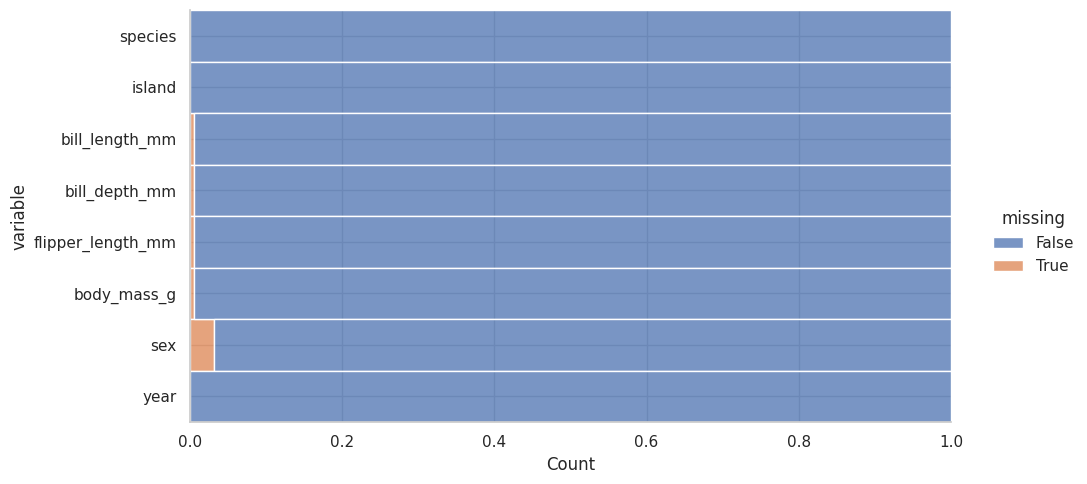

In [18]:
df.isna().melt(value_name="missing").pipe(lambda df: (sns.displot(data=df, y='variable', hue='missing', multiple='fill', aspect=2)));

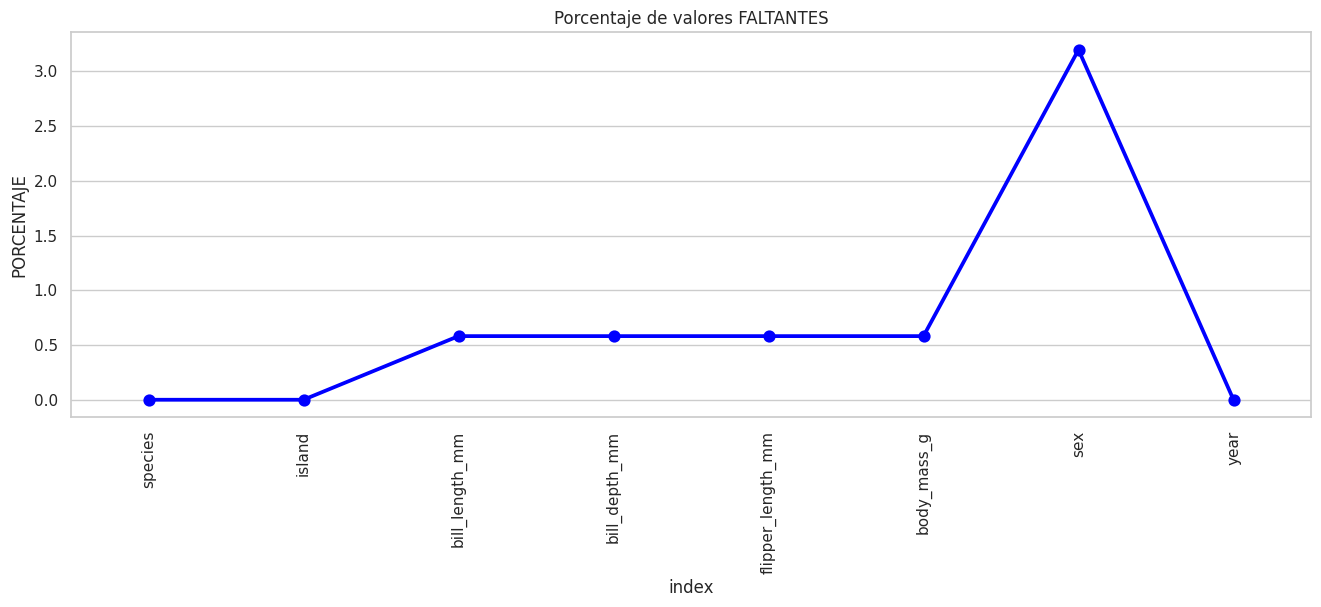

In [19]:
# DATAFRAME valores faltantes
missing = pd.DataFrame((df.isna().sum())*100 / df.shape[0]).reset_index()
# Grafica
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing, color='blue')
plt.xticks(rotation=90)
plt.title("Porcentaje de valores FALTANTES")
plt.ylabel("PORCENTAJE")
plt.show()

**Porporciones de los datos faltantes**

- **'bill_length_mm'**: 0.581%

- **'bill_depth_mm'**: 0.581%

- **'flipper_length_mm'**: 0.581%

- **body_mass_g**: 0.581%

- **'sex'**: 3.197%

- ***Total***: 5.523%

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

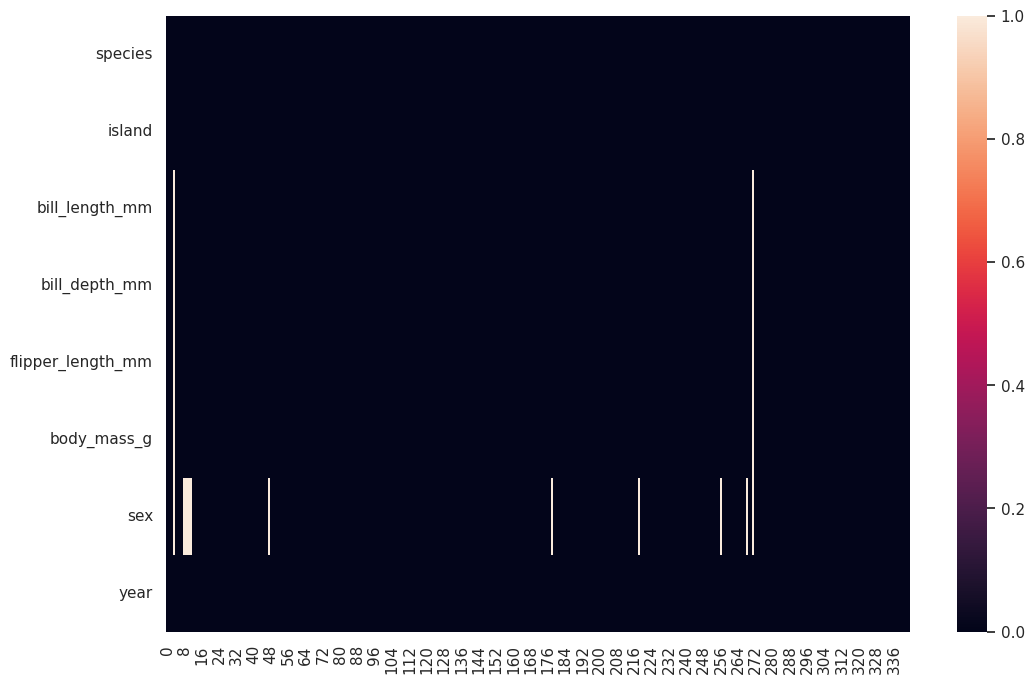

In [20]:
df.isna().transpose().pipe(lambda df: (sns.heatmap(data=df)));

# Tratamiento Inicial de Valores Faltantes

## General Thumb Rules:

- Para características con pocos valores faltantes, puedes utilizar la regresión para predecir los valores perdidos o llenarlos con la media de los valores presentes, dependiendo de la función en cuestión.

- Para aquellas características con un gran número de valores faltantes, resulta mejor eliminar dichas columnas ya que arrojan muy poca información útil durante el análisis.

- Dado que no hay una regla práctica específica sobre qué criterio emplear para eliminar columnas con un gran número de valores faltantes, generalmente puede optar por eliminarlas cuando éstas representan más del 30-40% de los mismos. Sin embargo, cabe señalar que pueden existir casos particulares donde tales decisiones deben ser tomadas sabiamente.

1. Creamos una copia de nuestro dataset base para poder manipularlo y procesarlo

In [21]:
processing_df = df.copy()

In [22]:
processing_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [23]:
processed_df = processing_df.dropna()
processed_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Nos quedan `333 Observaciones`

Quitamos: `11 Observaciones al dataset`

# Conteos y proporciones

## Conteo y Proporciones en base a:`"**ESPECIE DE PINGUINOS**"`

### ¿Cómo visualizar los conteos?

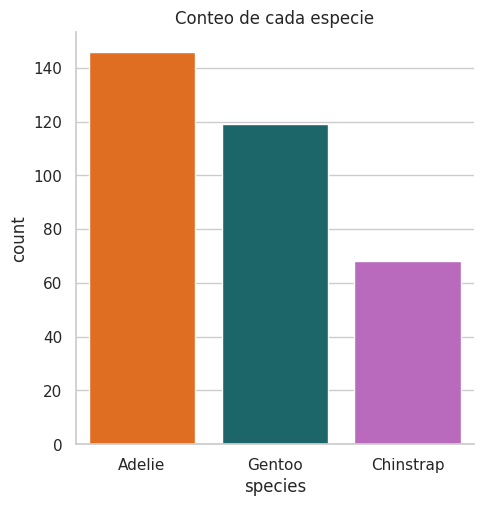

In [35]:
sns.catplot(data=processed_df, x='species', hue='species', kind='count', palette=penguin_colors)
plt.title("Conteo de cada especie")
plt.show()

### ¿Cómo visualizar las proporciones?

In [32]:
colors_list = [penguin_colors[penguin_species] for penguin_species in penguin_colors]

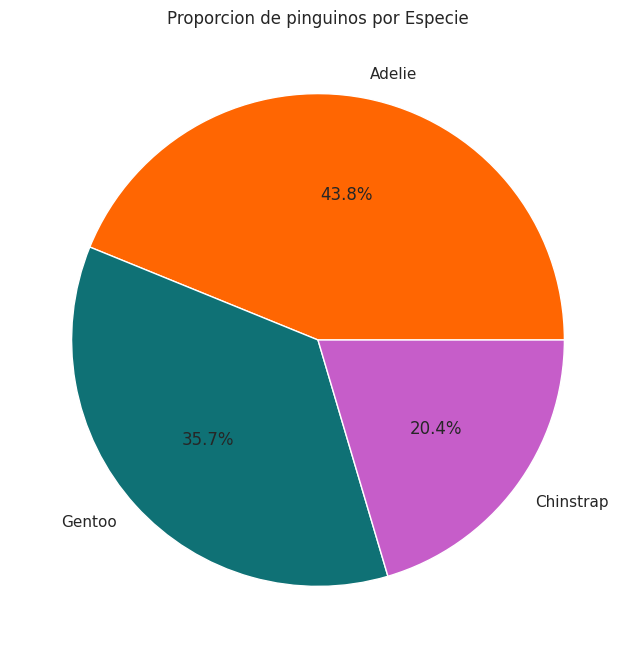

In [38]:
counts = processed_df['species'].value_counts().reset_index(name='counts')

# Grafico de pie
plt.pie(counts['counts'], labels=counts['species'], autopct='%1.1f%%', colors=colors_list)
plt.title('Proporcion de pinguinos por Especie')
plt.show()

# Medidas de tendencia central

In [49]:
resumen_data(processed_df).style.background_gradient(cmap='mako')

,Dtypes,missing#,missing%,uniques,primer_valor,ultimo_valor,count,min,max,mean,median
species,object,0,0.000000,3,Adelie,Chinstrap,333,nan,nan,nan,nan
island,object,0,0.000000,3,Torgersen,Dream,333,nan,nan,nan,nan
bill_length_mm,float64,0,0.000000,163,39.100000,50.200000,333,32.100000,59.600000,43.992793,44.500000
bill_depth_mm,float64,0,0.000000,79,18.700000,18.700000,333,13.100000,21.500000,17.164865,17.300000
flipper_length_mm,float64,0,0.000000,54,181.000000,198.000000,333,172.000000,231.000000,200.966967,197.000000
body_mass_g,float64,0,0.000000,93,3750.000000,3775.000000,333,2700.000000,6300.000000,4207.057057,4050.000000
sex,object,0,0.000000,2,male,female,333,nan,nan,nan,nan
year,int64,0,0.000000,3,2007,2009,333,2007.000000,2009.000000,2008.042042,2008.000000


In [50]:
print(f"Moda: {processed_df.mode(numeric_only=True)}")

Moda:    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0            41.1           17.0              190.0       3800.0  2009
